### business Undestanding
prédire si un clien souscrira à un dépot à long terme

### data undestanding
_age : Âge du client (numérique).
_-job : Type de profession (ex. : administrateur, inconnu, chômeur, étudiant, etc.).
-_marital : Statut matrimonial (marié, divorcé ou célibataire).
_-education : Niveau d'éducation (primaire, secondaire, supérieur ou inconnu).
_-default : Le client a-t-il un crédit en défaut ? (oui ou non).
_-balance : Solde annuel moyen du client, en euros (numérique).
-housing : Le client a-t-il un prêt immobilier ? (oui ou non).
-loan : Le client a-t-il un prêt personnel ? (oui ou non).
-contact : Type de communication utilisé pour le contact (téléphone, cellulaire ou inconnu).
-day : Jour du dernier contact dans le mois (numérique).
-month : Mois du dernier contact dans l'année (janvier à décembre).
-duration : Durée du dernier contact, en secondes (numérique).
-campaign : Nombre total de contacts effectués pour cette campagne (incluant le dernier).
-pdays : Nombre de jours depuis le dernier contact dans une campagne précédente (-1 = jamais contacté).
-previous : Nombre de contacts effectués avant cette campagne (numérique).
-poutcome : Résultat de la campagne marketing précédente (succès, échec, autre ou inconnu).


### une analyse exploratoire des données (EDA)

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# Advanced Modeling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import xgboost as xgb

In [2]:
dataset=pd.read_csv("bank.csv")

In [3]:
# Lire manuellement les données en tant que texte brut pour analyser les délimitations
file_path = "bank.csv"

with open(file_path, 'r') as file:
    raw_content = file.readlines()

# Analyser la première ligne pour identifier les colonnes
columns = raw_content[0].strip().split(';')
columns_cleaned = [col.replace('"', '') for col in columns]

# Recharger le DataFrame avec les colonnes corrigées
data_cleaned = [line.strip().split(';') for line in raw_content[1:]]
df_final = pd.DataFrame(data_cleaned, columns=columns_cleaned)

# Vérifier les premières lignes pour confirmer la correction
df_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""
4,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no"""


In [4]:
# Nettoyer les guillemets doubles dans toutes les colonnes
df_final_cleaned = df_final.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)

# Vérifier les premières lignes pour confirmer
df_final_cleaned.head()

C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_14504\1278494059.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final_cleaned = df_final.applymap(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


#### Notre DataFrame contient 17 colonnes, et toutes les colonnes ont un type de données objet. Cela indique que les données n'ont pas encore été converties dans leurs types appropriés (par exemple, les colonnes contenant des nombres sont toujours traitées comme des chaînes).

In [6]:
# Convert numeric columns to appropriate types
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_final_cleaned[numeric_columns] = df_final_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to 'category' type
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
df_final_cleaned[categorical_columns] = df_final_cleaned[categorical_columns].astype('category')

# Display updated DataFrame info
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
dtypes: category(10), int64(7)
memory usage: 293.4 KB


In [7]:
df_final_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Analyse univariée

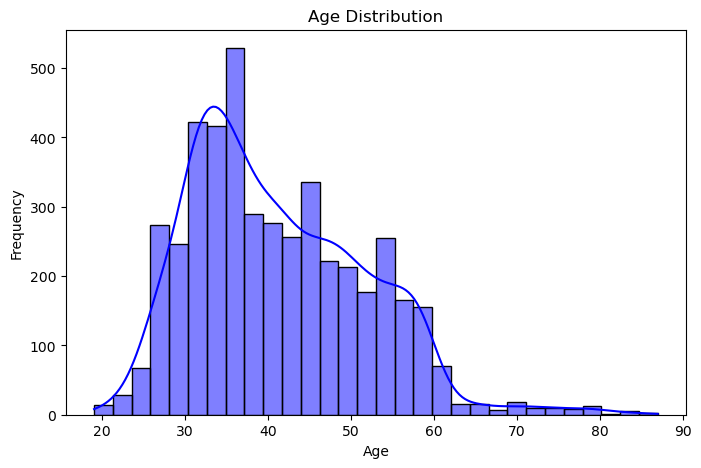

In [8]:
# Univariate analysis for age
plt.figure(figsize=(8, 5))
sns.histplot(df_final_cleaned['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Les âges sont majoritairement concentrés entre 30 et 50 ans.

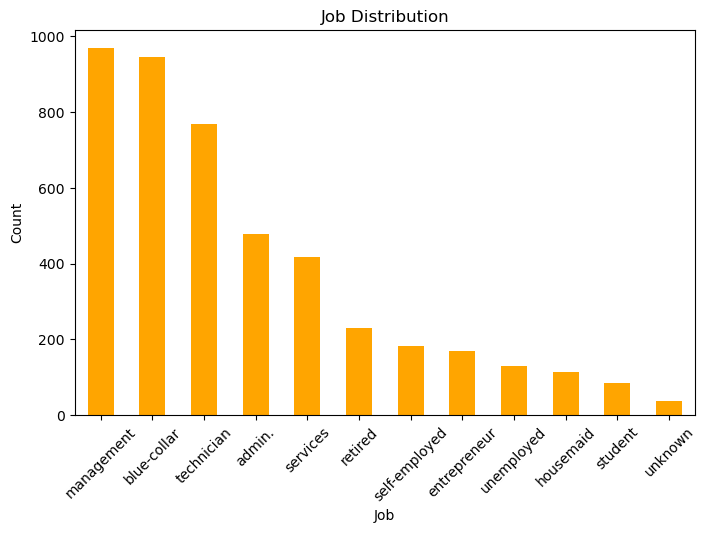

In [9]:
# Univariate analysis for job
plt.figure(figsize=(8, 5))
df_final_cleaned['job'].value_counts().plot(kind='bar', color='orange')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Certaines professions, comme «cadre» et «ouvrier», sont plus fréquentes.

Percentage distribution of 'y':
 y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64


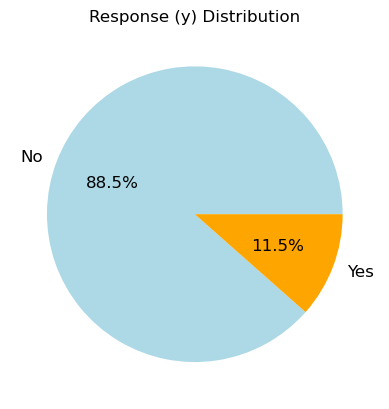

In [10]:
# Calculate the percentage distribution of 'y'
y_distribution = df_final_cleaned['y'].value_counts(normalize=True) * 100
print("Percentage distribution of 'y':\n", y_distribution)

# Optional pie chart visualization
y_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], labels=['No', 'Yes'], fontsize=12)
plt.title('Response (y) Distribution')
plt.ylabel('')
plt.show()

### Environ 86 % des réponses sont « non » (les clients n’ont pas accepté l’offre). Les 14 % restants représentent « oui » (les clients ont accepté l’offre).

## Analyse bivarié

C:\Users\SURFACEBOOK\AppData\Local\Temp\ipykernel_14504\4072880973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='y', x='balance', data=df_final_cleaned, palette="Set3", orient='h')


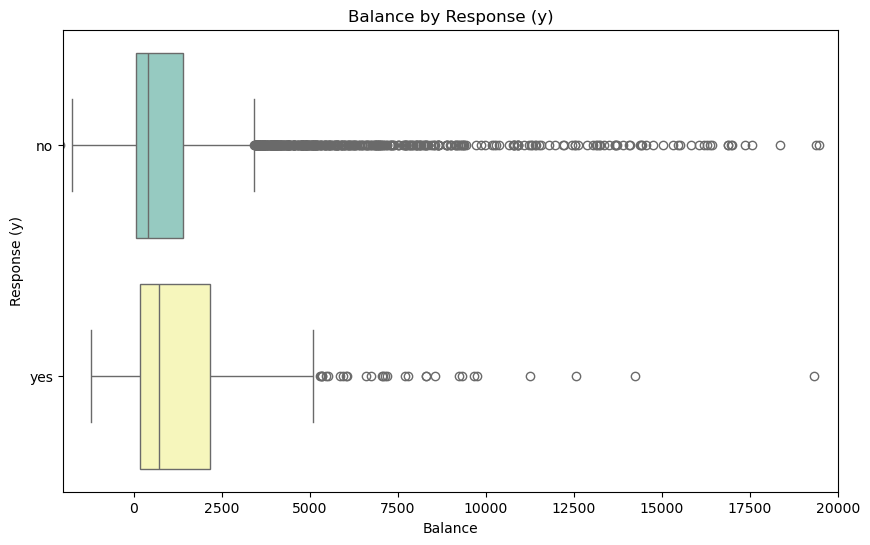

In [11]:
# Boxplot with zoomed scale
plt.figure(figsize=(10, 6))
sns.boxplot(y='y', x='balance', data=df_final_cleaned, palette="Set3", orient='h')
plt.title('Balance by Response (y)')
plt.xlabel('Balance')
plt.ylabel('Response (y)')
plt.xlim(-2000, 20000)  # Adjust scale for better visualization
plt.show()

### les clients qui ont répondue oui ont un compte banquaire porche de 0

#### Duration & y

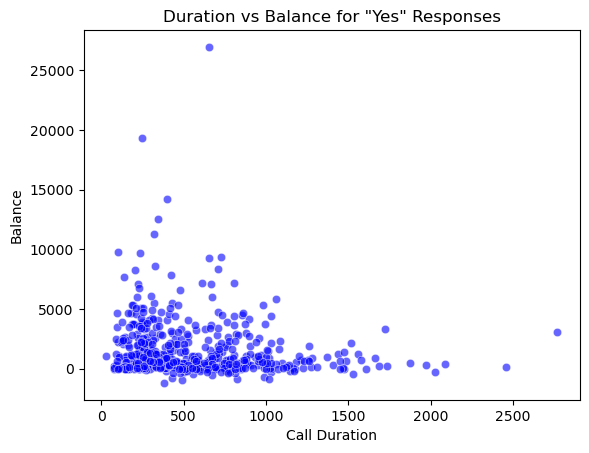

In [12]:
# Correlation between duration and balance for "yes"
yes_data = df_final_cleaned[df_final_cleaned['y'] == 'yes']
sns.scatterplot(x='duration', y='balance', data=yes_data, color='blue', alpha=0.6)
plt.title('Duration vs Balance for "Yes" Responses')
plt.xlabel('Call Duration')
plt.ylabel('Balance')
plt.show()

### La majorité des gens qui ont répondue oui ont un solde banquaire proche de 0 quelque soit la durée de l'appel .Il n'y pas corrélation entre la balance et la durée de l'appel

## Analyse multivariée

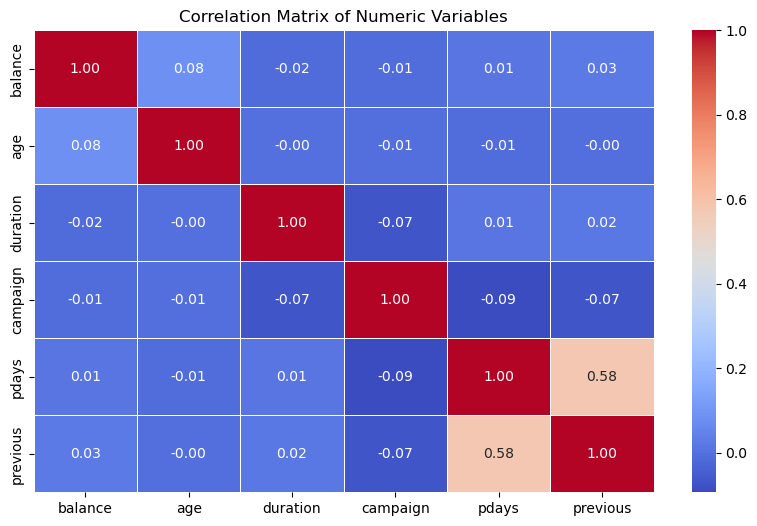

In [13]:
# Select only numeric columns
numeric_data = df_final_cleaned[['balance', 'age', 'duration', 'campaign', 'pdays', 'previous']]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## Feature engeenering

In [14]:
df_final_cleaned.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### data spliting 

In [15]:
X=df_final_cleaned.drop("y",axis=1)
y=df_final_cleaned["y"]

In [16]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


In [17]:
y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: category
Categories (2, object): ['no', 'yes']

### La division des données en 80 20

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state =42)

In [19]:
X_train.shape

(3616, 16)

In [20]:
y_train.shape

(3616,)

In [21]:
X_test.shape

(905, 16)

In [22]:
y_test.shape

(905,)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 978 to 860
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        3616 non-null   int64   
 1   job        3616 non-null   category
 2   marital    3616 non-null   category
 3   education  3616 non-null   category
 4   default    3616 non-null   category
 5   balance    3616 non-null   int64   
 6   housing    3616 non-null   category
 7   loan       3616 non-null   category
 8   contact    3616 non-null   category
 9   day        3616 non-null   int64   
 10  month      3616 non-null   category
 11  duration   3616 non-null   int64   
 12  campaign   3616 non-null   int64   
 13  pdays      3616 non-null   int64   
 14  previous   3616 non-null   int64   
 15  poutcome   3616 non-null   category
dtypes: category(9), int64(7)
memory usage: 259.6 KB


In [29]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns), index=X_test.index)

In [30]:
X_train_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
978,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
251,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X_train = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded], axis=1)

In [33]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
978,34,262,20,371,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
251,32,2349,14,134,5,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3139,34,1076,8,70,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1822,31,156,13,657,7,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4445,46,258,27,217,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

In [35]:
X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2398,51,-2082,28,123,6,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
800,50,2881,5,510,2,2,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2288,50,1412,6,131,3,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2344,37,0,3,247,13,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3615,31,757,3,343,2,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
y_train.unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [37]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)  # 'no' -> 0, 'yes' -> 1
y_test_encoded = label_encoder.transform(y_test)  # Ensure consistency for the test set

In [38]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
scaler = StandardScaler() 
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [43]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
978,-0.678371,-0.413804,0.489967,0.416038,-0.567241,-0.408832,-0.314583,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
251,-0.866030,0.334571,-0.238237,-0.507522,0.671186,-0.408832,-0.314583,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3139,-0.678371,-0.121913,-0.966441,-0.756922,-0.257635,-0.408832,-0.314583,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1822,-0.959860,-0.451815,-0.359604,1.530545,1.290399,-0.408832,-0.314583,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4445,0.447585,-0.415238,1.339538,-0.184081,-0.567241,-0.408832,-0.314583,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# Handle imbalanced classes with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

In [45]:
X_train_smote.shape

(6386, 51)

## Machine learning modeling

In [46]:
rfc=RandomForestClassifier(class_weight='balanced', random_state=42)


In [47]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
# Make predictions
y_pred = rfc.predict(X_test)

In [49]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred)

In [52]:
accuracy

0.8939226519337017

In [53]:
cm = confusion_matrix(y_test_encoded, y_pred)

In [54]:
cm

array([[775,  32],
       [ 64,  34]], dtype=int64)

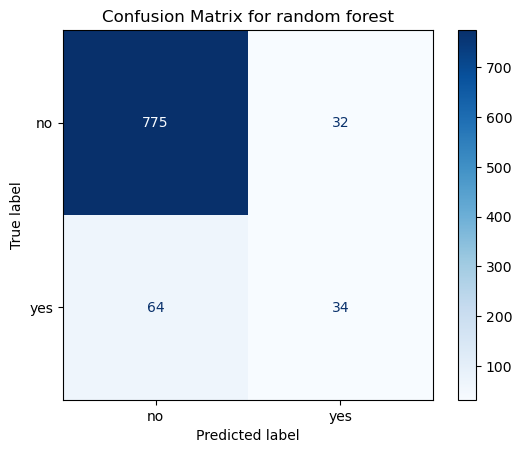

In [57]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for random forest")
plt.show()

In [58]:
lr=LogisticRegression(class_weight='balanced', random_state=42)

In [59]:
lr.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', random_state=42)

In [60]:
# Make predictions
y_pred = lr.predict(X_test)

In [61]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [62]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred)

In [63]:
accuracy

0.8353591160220994

In [64]:
cm = confusion_matrix(y_test_encoded, y_pred)

In [65]:
cm

array([[675, 132],
       [ 17,  81]], dtype=int64)

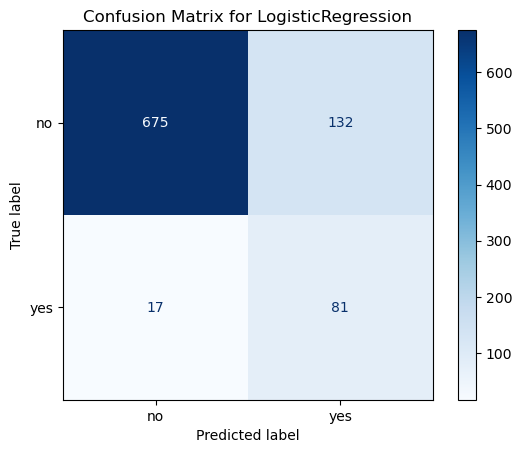

In [66]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for LogisticRegression")
plt.show()

In [68]:
# ROC-AUC score
y_proba = lr.predict_proba(X_test)[:, 1]  # Predicted probabilities for "yes"
roc_auc = roc_auc_score(y_test_encoded, y_proba)

In [69]:
y_proba

array([3.17125872e-02, 7.99759530e-01, 1.32732569e-01, 3.94593595e-02,
       7.58223441e-01, 3.06749779e-01, 5.90015219e-01, 7.79469740e-01,
       2.05844530e-01, 6.63349116e-01, 3.10570210e-01, 2.54318328e-01,
       4.77688482e-01, 9.97789910e-01, 1.24397723e-01, 2.76605492e-01,
       8.22108998e-01, 2.91979677e-01, 1.36239200e-01, 9.44376557e-03,
       1.10438640e-02, 8.12659663e-03, 9.72005989e-01, 1.30610126e-01,
       1.13796808e-01, 7.32434393e-02, 8.70558978e-01, 9.96157853e-01,
       2.25406867e-01, 5.64902732e-02, 7.17203947e-02, 1.66376246e-01,
       8.19501946e-03, 1.08193051e-01, 9.52366960e-02, 1.54823104e-01,
       9.77028535e-01, 5.93123725e-02, 1.43936449e-02, 2.70496936e-01,
       6.68619835e-02, 2.27477680e-01, 8.01174193e-01, 8.98259672e-01,
       4.34447214e-01, 2.12766327e-01, 7.11241971e-03, 2.62747527e-01,
       3.77876188e-01, 7.51425661e-02, 6.88170968e-02, 7.04584820e-01,
       8.77372676e-01, 1.30971014e-01, 1.14957219e-01, 2.03957776e-02,
      

In [70]:
roc_auc

0.8940014667577069

In [71]:
svc=SVC(class_weight='balanced', probability=True, random_state=42)

In [72]:
svc.fit(X_train_smote,y_train_smote)

SVC(class_weight='balanced', probability=True, random_state=42)

In [73]:
# Make predictions
y_pred = svc.predict(X_test)

In [74]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred)

In [75]:
accuracy

0.8629834254143647

In [76]:
cm = confusion_matrix(y_test_encoded, y_pred)

In [77]:
cm

array([[716,  91],
       [ 33,  65]], dtype=int64)

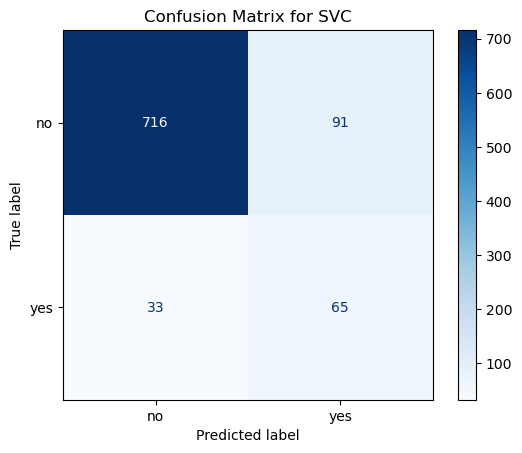

In [78]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for SVC")
plt.show()

In [80]:
import joblib
# Save the trained Gradient Boosting model
joblib.dump(rfc, 'random_forest_model.pkl')
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [84]:
!pip install gradio

   ---------------------------------------- 0.0/57.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/57.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/57.6 MB ? eta -:--:--
   ---------------------------------------- 0.5/57.6 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 1.0/57.6 MB 1.3 MB/s eta 0:00:43
    --------------------------------------- 1.3/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 1.6/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 1.8/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 2.1/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 2.4/57.6 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 2.6/57.6 MB 1.3 MB/s eta 0:00:42
   -- ------------------------------------- 2.9/57.6 MB 1.3 MB/s eta 0:00:42
   -- ------------------------------------- 3.1/57.6 MB 1.3 MB/s eta 0:00:42
   -- --------------

In [89]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger le modèle, l'encodeur et le scaler
model = joblib.load('random_forest_model.pkl')
encoder = joblib.load("encoder.pkl")
scaler = joblib.load("scaler.pkl")

# Définir les colonnes catégoriques et numériques
categorical_columns = [
    "job", "marital", "education", "default", "housing", 
    "loan", "contact", "month", "poutcome"
]
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Fonction de prétraitement des données d'entrée
def preprocess_input(data):
    try:
        # Convertir les données d'entrée en DataFrame
        input_df = pd.DataFrame([data])

        # Normaliser les colonnes numériques
        input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])

        # Encoder les colonnes catégoriques
        encoded_features = encoder.transform(input_df[categorical_columns])

        # Combiner les colonnes numériques avec les colonnes encodées
        numerical_features = input_df[numeric_columns].values
        final_features = np.concatenate([numerical_features, encoded_features], axis=1)

        return final_features
    except Exception as e:
        raise ValueError(f"Erreur dans le prétraitement des données : {e}")

# Fonction de prédiction
def predict(age, job, marital, education, default, balance, housing, loan, contact,
            day, month, duration, campaign, pdays, previous, poutcome):
    try:
        # Organiser les données en dictionnaire
        data = {
            "age": age,
            "job": job,
            "marital": marital,
            "education": education,
            "default": default,
            "balance": balance,
            "housing": housing,
            "loan": loan,
            "contact": contact,
            "day": day,
            "month": month,
            "duration": duration,
            "campaign": campaign,
            "pdays": pdays,
            "previous": previous,
            "poutcome": poutcome
        }

        # Prétraiter les données
        input_data = preprocess_input(data)

        # Effectuer la prédiction
        prediction = model.predict(input_data)

        # Retourner "yes" ou "no"
        return "yes" if prediction[0] == 1 else "no"
    except Exception as e:
        return f"Erreur lors de la prédiction : {e}"

# Interface utilisateur avec les nouveaux composants Gradio
with gr.Blocks() as interface:
    gr.Markdown("# Prediction Interface")
    gr.Markdown("Entrez les données du client pour prédire l'issue (yes/no).")

    with gr.Row():
        age = gr.Number(label="Age", minimum=0, maximum=120)
        job = gr.Dropdown(choices=["admin", "technician", "blue-collar", "management", "retired", "services", "student", "unemployed", "self-employed"], label="Job")
        marital = gr.Dropdown(choices=["married", "single", "divorced"], label="Marital Status")
        education = gr.Dropdown(choices=["primary", "secondary", "tertiary", "unknown"], label="Education")
        default = gr.Dropdown(choices=["yes", "no"], label="Default (Has Credit in Default)")
        balance = gr.Number(label="Balance", minimum=-100000, maximum=100000)

    with gr.Row():
        housing = gr.Dropdown(choices=["yes", "no"], label="Housing (Has Housing Loan)")
        loan = gr.Dropdown(choices=["yes", "no"], label="Loan (Has Personal Loan)")
        contact = gr.Dropdown(choices=["telephone", "cellular", "unknown"], label="Contact Type")
        day = gr.Number(label="Day", minimum=1, maximum=31)
        month = gr.Dropdown(choices=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], label="Month")
        duration = gr.Number(label="Duration", minimum=0)

    with gr.Row():
        campaign = gr.Number(label="Campaign", minimum=1)
        pdays = gr.Number(label="Pdays", minimum=-1)
        previous = gr.Number(label="Previous", minimum=0)
        poutcome = gr.Dropdown(choices=["success", "failure", "unknown", "other"], label="Poutcome (Previous Outcome)")

    predict_button = gr.Button("Predict")
    output = gr.Textbox(label="Prediction")

    # Lier les composants à la fonction de prédiction
    predict_button.click(
        predict, 
        inputs=[age, job, marital, education, default, balance, housing, loan, contact,
                day, month, duration, campaign, pdays, previous, poutcome], 
        outputs=output
    )

# Lancer l'application
interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://92bfe242b604982875.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\SURFACEBOOK\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
